In [ ]:
 # Analyzing Air Quality Index (AQI) Trends in a City 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('city_day.csv')

In [3]:
# Step 2: Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get a summary of the dataset
print(df.describe())  # Get statistical information

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [7]:
# Check if these columns exist
relevant_columns = ['Date', 'AQI', 'PM2.5', 'PM10', 'CO']
for col in relevant_columns:
    if col not in df.columns:
        print(f"{col} not found in the dataset")

In [5]:
df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [8]:
# Convert 'date' column to datetime format for time series analysis
df['Date'] = pd.to_datetime(df['Date'])

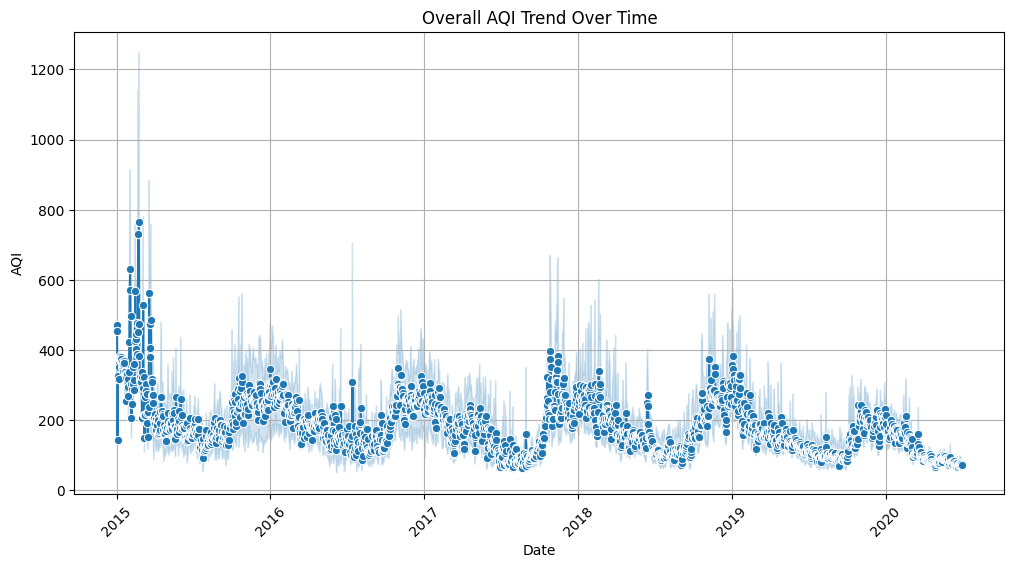

In [12]:

# Step 4: Visualize overall AQI trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='AQI', marker='o')
plt.title('Overall AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid()
plt.show()

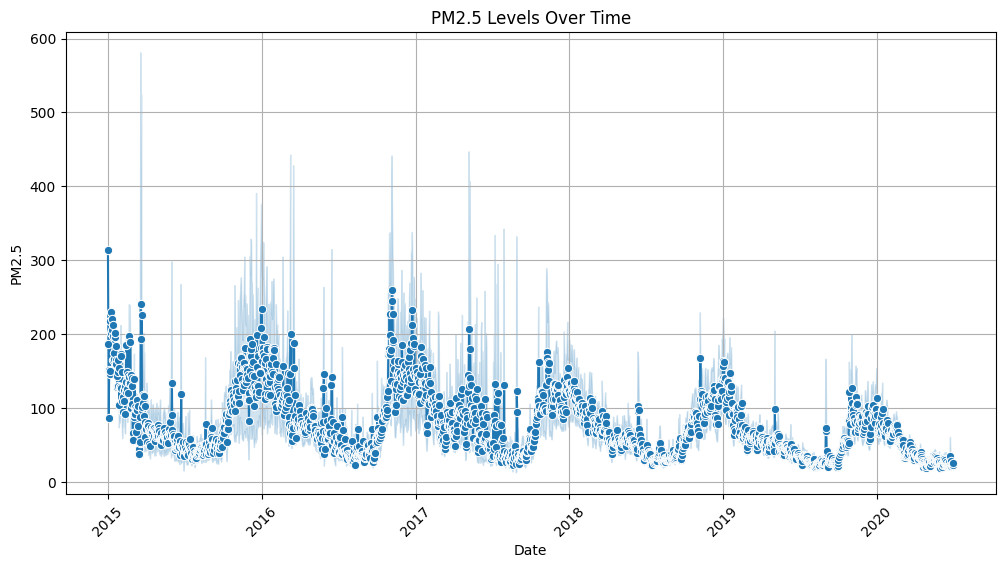

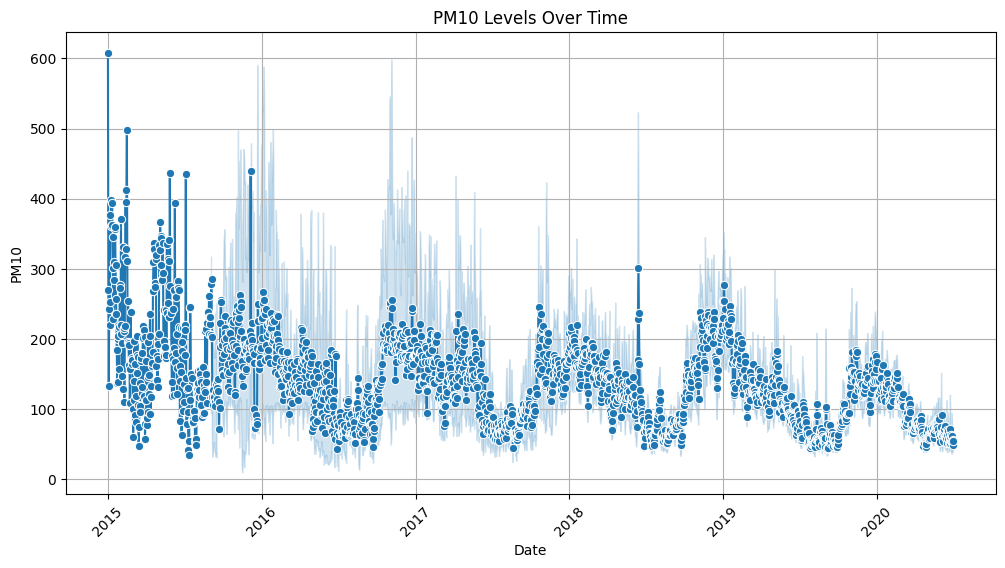

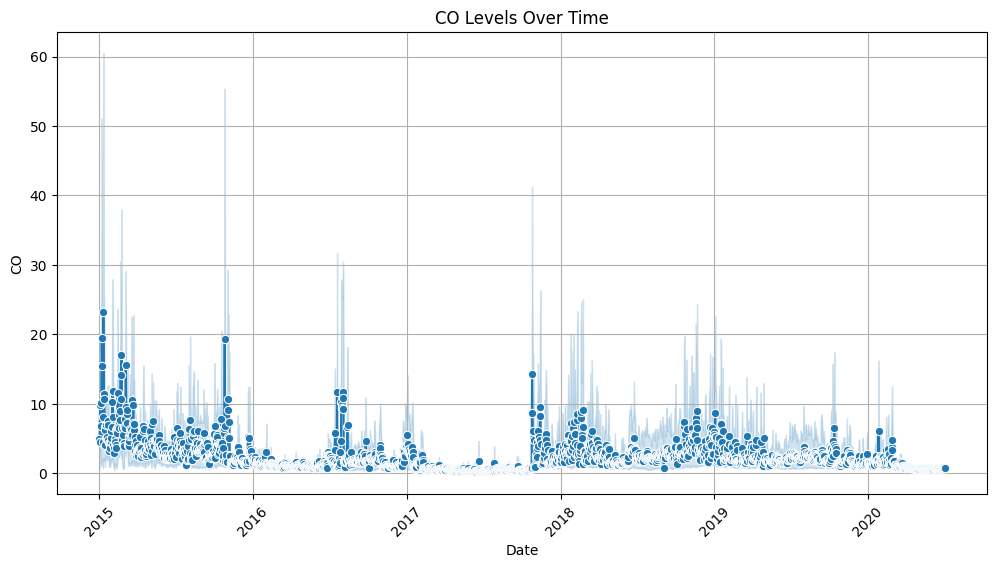

In [15]:
# Step 5: Plot individual pollutant levels
pollutants = ['PM2.5', 'PM10', 'CO']
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Date', y=pollutant, marker='o')
    plt.title(f'{pollutant} Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

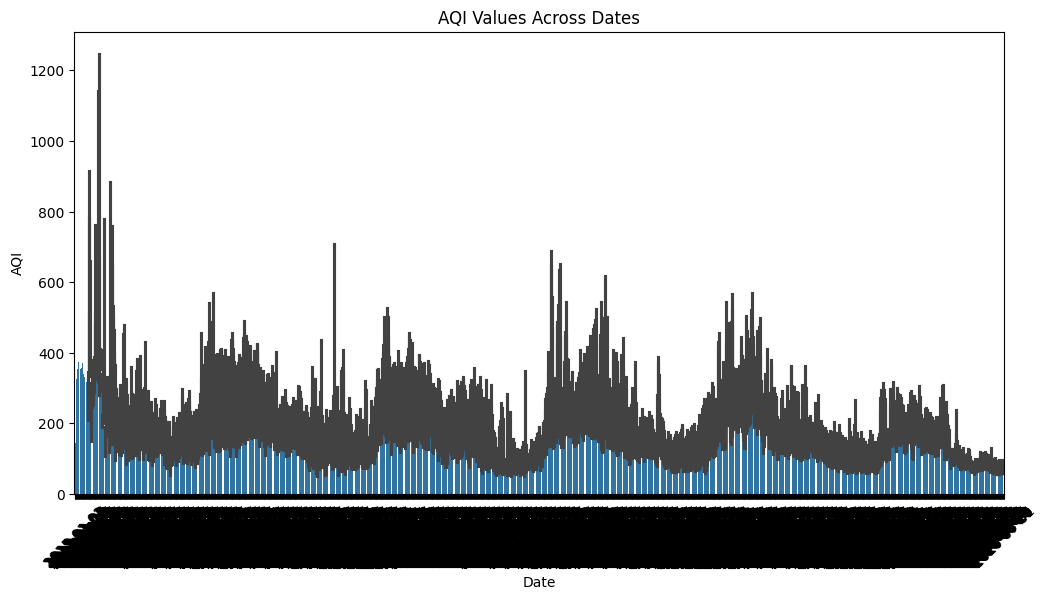

In [21]:
# Step 6: Compare AQI values across different dates (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Date', y='AQI')
plt.title('AQI Values Across Dates')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

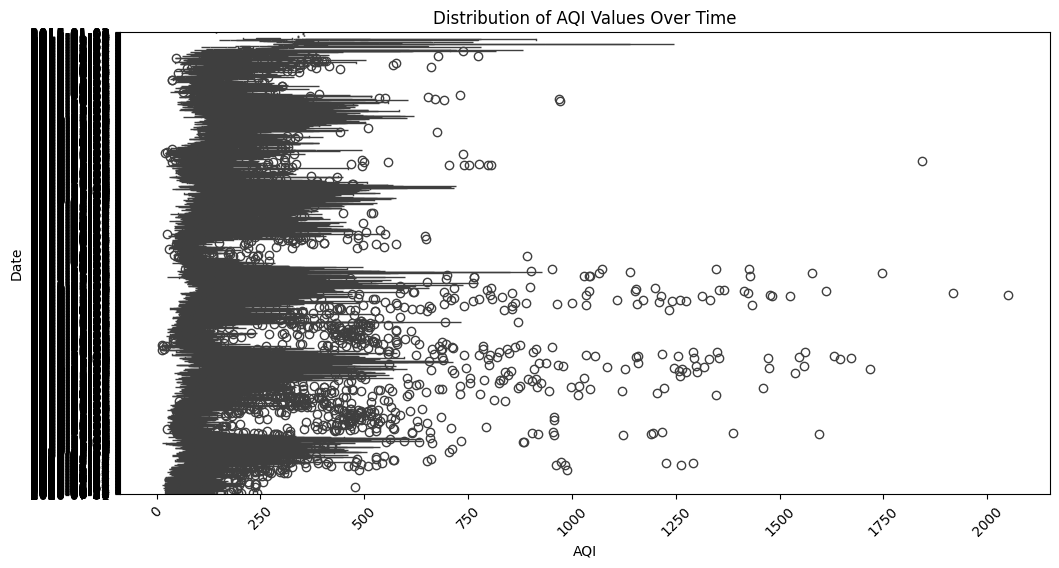

In [24]:
# Step 7: Box Plot for AQI distribution by pollutant category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AQI', y='Date')
plt.title('Distribution of AQI Values Over Time')
plt.xlabel('AQI')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

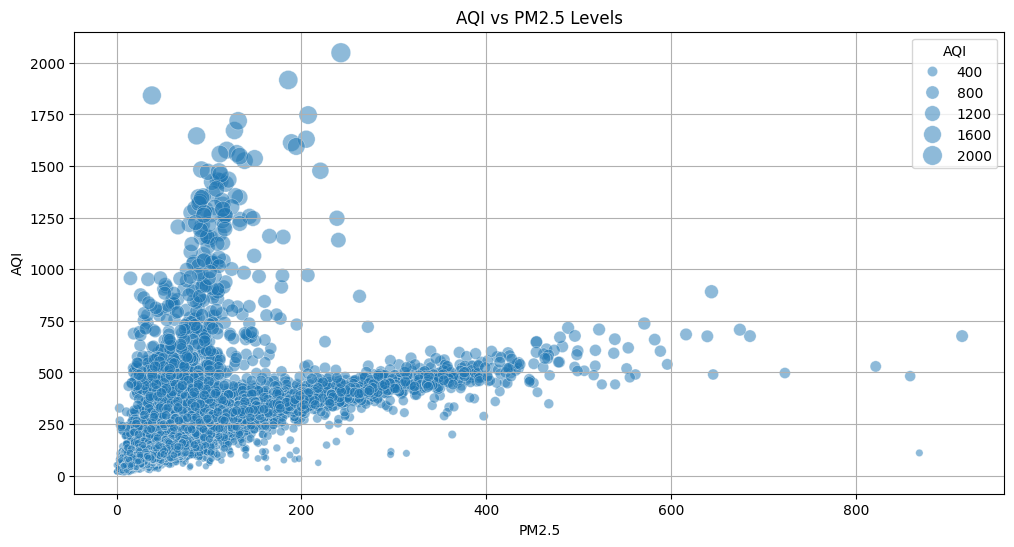

In [25]:
# Step 8: Scatter plot to explore relationship between AQI and PM2.5
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PM2.5', y='AQI', size='AQI', sizes=(20, 200), alpha=0.5)
plt.title('AQI vs PM2.5 Levels')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid()
plt.show()